In [1]:
import pandas as pd
import geopandas as gpd
import pickle
import osmnx as ox
import matplotlib.pyplot as plt

In [3]:
iris=pd.read_excel("Y:\REFERENTIEL DATA\RP 2022 FRANCE\GEODATA - IRIS\Geodata_IRIS_essentiels.xlsx")

In [7]:
columns=pd.read_excel("Y:\REFERENTIEL DATA\RP 2022 FRANCE\GEODATA - IRIS\Geodata_IRIS_RP2017.xlsx",sheet_name="Dico Geodata-IRIS-2017")

In [19]:
col= [i.lower().strip() for i in columns['NAME'].to_numpy()]

In [24]:
len(iris.columns)

137

In [32]:
for c in iris.columns:
    
    a=columns[columns['NAME']==c]
    if len(a)!=0:
        print("\n\n==================================================================")
        print(c)
        print(a['LABEL'].to_numpy())



REG
['Région']


DEP
['Département']


UU2010
['Unité urbaine']


COM
['Commune ou ARM']


LIBCOM
['Libellé commune ou ARM']


TRIRIS
['TRIRIS']


GRD_QUART
['Grand quartier']


LIBIRIS
['Libellé de lIRISTYP_IRIS      =      Type dIRIS']


TYP_IRIS
["Type d'IRIS : habitat (H), activité (A), divers (D), Autre (Z)"]


MODIF_IRIS
['Modification de lIRISLAB_IRIS      =      Label de lIRIS']


LAB_IRIS
['LAB_IRIS']


C17_MEN
['Ménages en 2017 (compl)']


C17_MEN_CS1
['Ménages Pers Réf Agri. expl. en 2017 (compl)']


C17_MEN_CS2
['Ménages Pers Réf Art. Comm. Chef entr. en 2017 (compl)']


C17_MEN_CS3
['Ménages Pers Réf Cadre Prof int sup en 2017 (compl)']


C17_MEN_CS4
['Ménages Pers Réf Prof intermédiaire en 2017 (compl)']


C17_MEN_CS5
['Ménages Pers Réf Employé en 2017 (compl)']


C17_MEN_CS6
['Ménages Pers Réf Ouvrier en 2017 (compl)']


C17_MEN_CS7
['Ménages Pers Réf Retraité en 2017 (compl)']


C17_MEN_CS8
['Ménages Pers Réf Autre en 2017 (compl)']


P17_POP
['Population en 2017 (pri

In [9]:
path=r"Y:\RECHERCHE ET DEV\10_Modèle d'attractivite des rues\osm\paris"
place_name="Paris"

In [85]:
building=pd.read_pickle(path+r"\ways.pkl")

<AxesSubplot:>

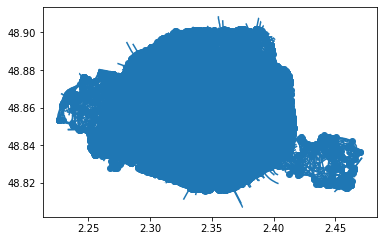

In [86]:
building.plot()

In [88]:
building

geometry   
element_type osmid                                                         
node         360932                             POINT (2.35727 48.82618)  \
             360935                             POINT (2.35038 48.82581)   
             360937                             POINT (2.34659 48.82576)   
             360938                             POINT (2.34521 48.82594)   
             360946                             POINT (2.32265 48.82930)   
...                                                                  ...   
relation     15641759  POLYGON ((2.37241 48.82887, 2.37243 48.82888, ...   
             15641760  POLYGON ((2.37336 48.82814, 2.37335 48.82814, ...   
             15641761  POLYGON ((2.37195 48.82508, 2.37195 48.82509, ...   
             15666825  POLYGON ((2.38362 48.86640, 2.38363 48.86637, ...   
             15712702  POLYGON ((2.28125 48.84897, 2.28153 48.84917, ...   

                               highway               name  
element_type osmid                                         
node         360932    traffic_signals                NaN  
             360935    traffic_signals                NaN  
             360937    traffic_signals                NaN  
             360938    traffic_signals                NaN  
             360946    traffic_signals                NaN  
...                                ...                ...  
relation     15641759          footway                NaN  
             15641760          footway                NaN  
             15641761          footway                NaN  
             15666825       pedestrian  Place Jean Ferrat  
             15712702       pedestrian                NaN  

[101137 rows x 3 columns]

In [89]:
building.isna().sum()

geometry        0
highway         0
name        75325
dtype: int64

In [91]:
building['highway'].value_counts().head(20)

highway
footway            31247
crossing           22849
residential         6651
service             6131
street_lamp         5962
steps               5266
traffic_signals     3912
pedestrian          3421
bus_stop            2810
primary             2631
cycleway            1943
secondary           1683
tertiary            1544
path                1496
unclassified         570
living_street        543
trunk_link           381
track                337
elevator             331
trunk                308
Name: count, dtype: int64

In [29]:
buildings_types=building['shop'].value_counts().head(20).index
nan_level_by_building=[building[building['shop']==i]['building:levels'] .isna().sum() for i in buildings_types]
num_types=[len(building[building['building']==i]) for i in buildings_types]

In [42]:
import numpy as np
np.array(nan_level_by_building)/np.array(num_types)

array([0.47314102, 0.20251802, 0.32004197, 0.29178082, 0.87410587,
       0.25952813, 0.36015326, 0.46685083, 0.17701863, 0.71311475,
       0.26754386, 0.67272727, 0.4972067 , 0.29333333, 0.36363636,
       0.20792079, 0.05154639, 0.5       , 0.49411765, 0.45454545])

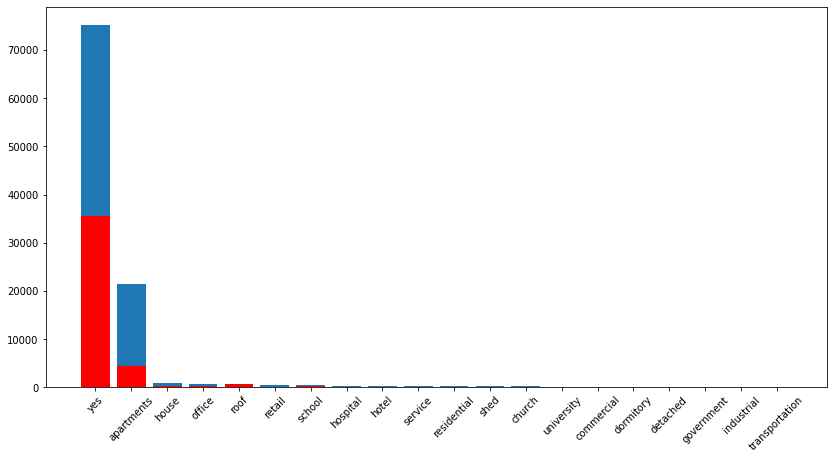

In [39]:
plt.figure(figsize=(14,7))

plt.bar(buildings_types,num_types,label="size of each building type")
plt.bar(buildings_types,nan_level_by_building,color="red",label="nan values")
plt.xticks(rotation = 45)
plt.title("Nan values of Building:level for each category")
plt.show()

In [69]:
pd.read_pickle(r"Y:\RECHERCHE ET DEV\10_Modèle d'attractivite des rues\association\buildings_leisure.pkl")

[{'building': [('way', 626410287)], 'leisure': ('node', 283352094)},
 {'building': [('way', 78019607)], 'leisure': ('node', 297918329)},
 {'building': [('way', 78146299)], 'leisure': ('node', 530272869)},
 {'building': [('way', 78148936)], 'leisure': ('node', 535950232)},
 {'building': [('way', 69104429)], 'leisure': ('node', 597416676)},
 {'building': [('relation', 533513)], 'leisure': ('node', 672956260)},
 {'building': [('way', 370319723)], 'leisure': ('node', 683438716)},
 {'building': [('way', 54443221)], 'leisure': ('node', 685907646)},
 {'building': [('relation', 547493)], 'leisure': ('node', 689144616)},
 {'building': [('way', 55180561)], 'leisure': ('node', 693733161)},
 {'building': [('relation', 562635)], 'leisure': ('node', 700256810)},
 {'building': [('way', 55760894)], 'leisure': ('node', 700449131)},
 {'building': [('way', 58150036)], 'leisure': ('node', 721443159)},
 {'building': [('way', 54979144)], 'leisure': ('node', 725594699)},
 {'building': [('way', 59213962)], 'l

In [58]:
gsa=pd.read_csv('Y:\REFERENTIEL DATA\RP 2022 FRANCE\GEODATA - Reseaux de distibution\GSA_GSS 2020\GSA_2022_clean.csv')

<>:1: DeprecationWarning: invalid escape sequence \R
<>:1: DeprecationWarning: invalid escape sequence \R
C:\Users\Diametrix\AppData\Local\Temp\ipykernel_6156\643690856.py:1: DeprecationWarning: invalid escape sequence \R
  gsa=pd.read_csv('Y:\REFERENTIEL DATA\RP 2022 FRANCE\GEODATA - Reseaux de distibution\GSA_GSS 2020\GSA_2022_clean.csv')
C:\Users\Diametrix\AppData\Local\Temp\ipykernel_6156\643690856.py:1: DtypeWarning: Columns (9,44) have mixed types. Specify dtype option on import or set low_memory=False.
  gsa=pd.read_csv('Y:\REFERENTIEL DATA\RP 2022 FRANCE\GEODATA - Reseaux de distibution\GSA_GSS 2020\GSA_2022_clean.csv')


In [60]:
gsa[(gsa['CP']>=75000) & (gsa['CP']<=75999)]

,Unnamed: 0,TDLinx,Type_Mag,Type_secondaire,Nom_Enseigne,CP,Ville,Complément d'adresse,N__Nom_de_voie,N__commune_Insee,...,Date changement Centrale,Date_changement_Nom,Date changement Type,Date Création_,Nom_pr_c_dent,X__Lambert_2_,Y__Lambert_2_,X__WGS84_,Y__WGS84_,dciris
126,126,256688,Hypermarché,-,CARREFOUR,75016,PARIS,NaN,1-3 av du Général Sarrail,75116,...,01/06/2021,NaN,NaN,1972-10-17,NaN,594069.68,2427502.63,2.255751,48.845849,751166177
243,243,256907,Hypermarché,-,GEANT CASINO,75013,PARIS,C C LA GALERIE MASSENA,98 bd Masséna,75113,...,01/06/2021,1994-09-05,NaN,1974-09-25,RALLYE,602157.00,2424797.00,2.365865,48.821556,751135003
599,599,257731,Hypermarché,Magasin Populaire,MONOPRIX,75020,PARIS,NaN,20 bd de Charonne,75120,...,NaN,NaN,NaN,1963-05-01,NaN,604602.86,2427918.50,2.399189,48.849598,751208004
1254,1254,262342,Superette,-,FRANPRIX,75001,PARIS,NaN,16 rue Bertin Poirée,75101,...,13/05/2002,2002-05-13,2010-01-01,1983-12-31,G 20,600629.00,2428966.00,2.345073,48.859028,751010101
1255,1255,262343,Superette,-,FRANPRIX,75003,PARIS,NaN,26 rue Rambuteau,75103,...,02/01/2000,2000-01-02,2000-01-02,1992-08-01,G 20,601310.00,2429177.00,2.354349,48.860924,751041302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21794,21801,7603947,Superette,-,PROXI,75015,PARIS,NaN,269 rue Lecourbe,75115,...,NaN,NaN,NaN,2020-05-04,NaN,596545.24,2426694.40,2.289468,48.838603,751155711
21824,21831,7604061,Superette,-,MY AUCHAN,75017,PARIS,Quartier de la Plaine de Monceau,15 rue Brémontier,75117,...,NaN,NaN,NaN,2021-10-06,NaN,597596.81,2431840.39,2.303756,48.884857,751176609
21832,21840,7604112,Supermarché,-,MY AUCHAN,75017,PARIS,NaN,11 rue de Bremontier,75117,...,NaN,NaN,NaN,2021-10-27,NaN,597605.31,2431830.37,2.303872,48.884767,751176609
21833,21841,7604113,Superette,-,FRANPRIX,75015,PARIS,NaN,23 rue Dombasle,75115,...,NaN,NaN,NaN,2021-10-27,NaN,597149.70,2426405.78,2.297700,48.836012,751155715
